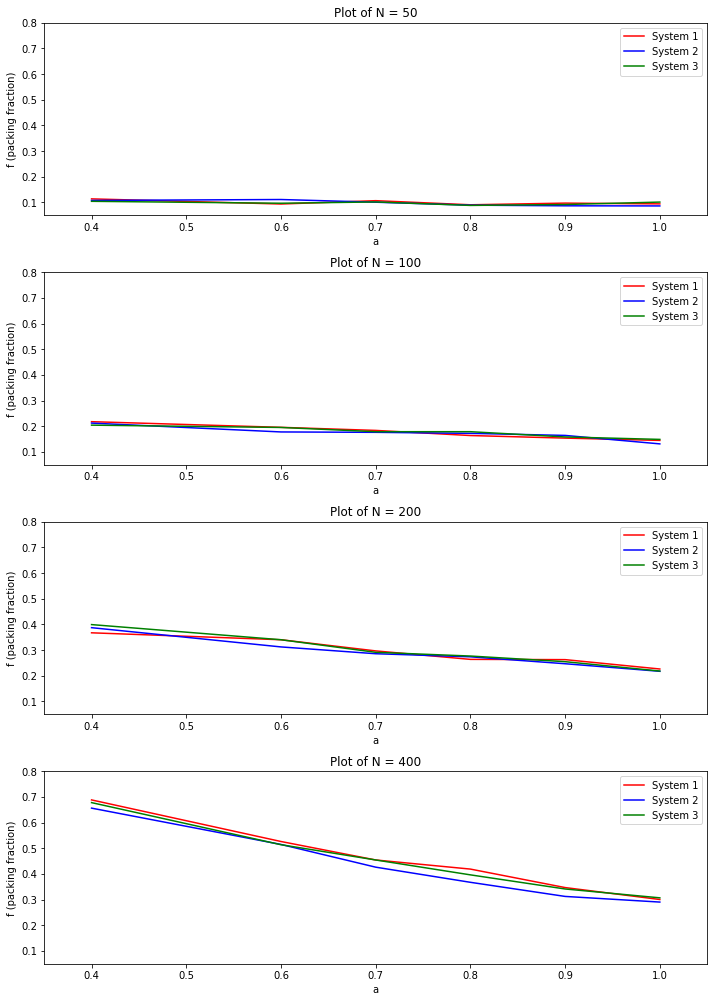

Table of Root Square Mean Error for a = 0.8 and N = 400:
╒═════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ N_sample:   │ 100      │          │          │ 200      │          │          │ 400      │          │          │
╞═════════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ N_rep       │ System 1 │ System 2 │ System 3 │ System 1 │ System 2 │ System 3 │ System 1 │ System 2 │ System 3 │
├─────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 10          │ 0.06369  │ 0.0398   │ 0.04578  │ 0.04733  │ 0.0499   │ 0.02398  │ 0.02592  │ 0.02577  │ 0.02848  │
├─────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 20          │ 0.04863  │ 0.03968  │ 0.05054  │ 0.04672  │ 0.03484  │ 0.03611  │ 0.02972  │ 0.02358  │ 0.03203  │
├─────────────┼────────

In [34]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np
import sklearn.metrics
from tabulate import tabulate

pi = math.pi

class Point():
    def __init__(self, x, y, R): #creates class called point with attributes x, y, and R
        self.x = x
        self.y = y
        self.R = R
    
# Function, Simulate takes the inputs: R1, R2, prob, a, N, N_rep, N_sample, file. Where R1 and R2 are the radii of the two sphers,
# prob is the probability of a sphere to have radius R1, a is inversely proportional to the overlap you allow between two particles,
# N is the number of particles you wish to TRY to deposit onto the surface, N_rep is the number of times the functions will reset
# the plot and start another trial, N_sample is the number of points you want to check to estimate the packing fraction using the
# monte carlo method, file is a boelean expression to determine if you want a file containing all the radii and coordinates of used
# points.
# The output of the function is f, the average packing fraction over the simulation and f_list, a list a packing fractions created in
# simulation in order to find the average packing fraction
def simulate(R1, R2, prob, a, N, N_rep, N_sample, file):
    N_valid = 0
    f_list = []
    points = [] #creating empty list of points
    if file == True:
        with open("{0} - {1}.txt".format(a, N), "a") as file1:
            file1.truncate(0)
            file1.write("Radius             x-coordinate       y-coordinate\n")
            file1.close
    for j in range(N_rep):
        f = 0
        for i in range(N): #trying to plot N amount of points
            r_prob = random.randint(0,100)
            if r_prob<prob: #where r_prob is a random number 0-100 and prob is the probability of the radius being R1
                Ra = R1
            else:
                Ra = R2
                
            new_pt = Point(random.uniform(0,20),random.uniform(0,20),Ra) #define a new point
            
            #checking distance between new point and any other point in list points
            distance = True
            for pt in points:
                    d = math.sqrt((new_pt.x - pt.x)**2 + (new_pt.y - pt.y)**2)
                    if d <= a*(new_pt.R + pt.R):
                        distance = False
                        
            # only add point to list of points if it's center is distance R away from the side AND previous previous criteria met 
            if new_pt.R < new_pt.x < 20 - new_pt.R and new_pt.R < new_pt.y < 20 - new_pt.R and distance:
                points.append(new_pt)
                if file == True: #creating a text file if file = True
                    file1 = open("{0} - {1}.txt".format(a, N), "a") #
                    file1.write("{0} {1} {2}\n".format(new_pt.R, new_pt.x, new_pt.y))
                    file1.close
        for h in range(N_sample):
            rdn_pnt = (random.uniform(0,20),random.uniform(0,20)) #random point in sqaure
            
            #checking if this point lies within any points in list
            for v_pt in points: 
                d1 =(rdn_pnt[0] - v_pt.x)**2 + (rdn_pnt[1] - v_pt.y)**2
                if d1 <= v_pt.R**2: 
                    N_valid += 1 #if point does lie in circle it is valid
        points = [] #reset points list to empty for a new N_rep to occur
        
        f_sample = N_valid / N_sample #f_sample is the packing fraction of one repitition of simulation
        f_list.append(f_sample) #adds f_sample to a list of all packing fractions used over all simulations
        f_sample = 0
        N_valid = 0        
    f = sum(f_list)/ len(f_list) #f is the average packing fraction of all repititions of simulations
    return f, f_list

#list of a values we want to find packing fraction for graph
a_list = [0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
#list of N values we want to find packing fraction for graph
N_list = [50, 100, 200, 400]
#list of Radii and probabilities for each system (monodisperse, bidisperse, additional bidisperse)
R_list = [[1/math.sqrt(pi), 1/math.sqrt(pi), 100], [math.sqrt(3/(2*pi)), math.sqrt(1/(2*pi)), 50], [math.sqrt(5/(4*pi)), math.sqrt(15/(16*pi)), 20]]

#defines a figure with 4 subplots
fig, ax = plt.subplots(4, figsize=(10,14))

#formats each subplot with titles, axis limits and axis titles
for x in range(len(ax)):
    ax[x].set(xlim = (0.35, 1.05), ylim = (0.05, 0.8), xlabel = "a", ylabel= "f (packing fraction)", title = "Plot of N = {N}".format(N = N_list[x]))

#GRAPH PLOTTING ALGORITHM
#gives each system a color and a legend for each graph
for [R_1, R_2, p] in R_list:
    if [R_1, R_2, p] == R_list[0]:
        C_line = "red"
        lab = 'System 1'
    elif [R_1, R_2, p] == R_list[1]:
        C_line = "blue"
        lab = 'System 2'
    else:
        C_line = "green"
        lab = 'System 3'
    #loops through each system, each N and each a and plot on graph    
    for i in N_list:
        y_50 = [] #list of packing fractions to be plotted in N = 50
        y_100 = [] #list of packing fractions to be plotted in N = 100
        y_200 = [] #list of packing fractions to be plotted in N = 200
        y_400 = [] #list of packing fractions to be plotted in N = 400
        for x in a_list:
            y, f_list= simulate(R_1, R_2, p, x, i, 10, 200, False)
            if i == 50:
                y_50.append(y)
                y_ = y_50
                axis = ax[0]
            elif i == 100:
                y_100.append(y)
                y_ = y_100
                axis = ax[1]
            elif i == 200:
                y_200.append(y)
                y_ = y_200
                axis = ax[2]
            else:
                y_400.append(y) 
                y_ = y_400
                axis = ax[3]
        axis.plot(a_list, y_, color = C_line, label = lab )#add each line to each plot
        leg = axis.legend(); #adds legends to each plots
plt.tight_layout(pad=1.0)
plt.savefig('Packingfraction_against_a_figure.png', pad_inches = 0.5, edgecolor = 'white') #saves figure as a file
plt.show()

N_rep_list = [10, 20, 40, 80] #define list of N_rep for accuracy calculation
N_sample_list = [100, 200, 400] ##define list of N_sample for accuracy calculation

#defining first twßo rows in table
table = [['N_rep', 'System 1', 'System 2', 'System 3', 'System 1', 'System 2', 'System 3', 'System 1', 'System 2', 'System 3']]
col_names = ['N_sample:', '{0}'.format(N_sample_list[0]), '', '', '{0}'.format(N_sample_list[1]), '', '', '{0}'.format(N_sample_list[2]), '', '']

#TABLE PLOTTING ALGORITHM
for i in N_rep_list:
    row = []
    row.append(i)
    for j in N_sample_list:
        for [R_1, R_2, p] in R_list:
            y, f_list= (simulate(R_1, R_2, p, 0.8, 400, i, j, False))
            y_list = []
            for h in range(len(f_list)):
                y_list.append(y)
#             rmse = round(math.sqrt(np.square(np.subtract(f_list, y_list).mean())), 6)
            #calculates rsme for each simulation
            rmse = round(sklearn.metrics.mean_squared_error(f_list, y_list, squared = False), 5 )            
            row.append(rmse)
    table.append(row)
                         
print('Table of Root Square Mean Error for a = 0.8 and N = 400:')
print(tabulate(table, tablefmt="fancy_grid", headers=col_names)) #plots and styles table
#adds table to a file
with open('table.pdf', 'w') as file2:
    file2.write(tabulate(table, tablefmt="fancy_grid", headers=col_names))
    file2.close

#CONFIGURATION FILES SECTION (file = True)
file_plotter1 = simulate(1/math.sqrt(pi), 1/math.sqrt(pi), 100, 0.8, 400, 20, 300, True)
file_plotter2 = simulate(math.sqrt(3/(2*pi)), math.sqrt(1/(2*pi)), 50, 0.8, 500, 20, 300, True)
file_plotter3 = simulate(math.sqrt(5/(4*pi)), math.sqrt(15/(16*pi)), 20, 0.8, 600, 20, 300, True)